# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [48]:
# student 1: Nofar 9678

## Part 2 - Initial Preparations 
You could add as many code cells as needed

Train Dataset First 5 Rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0



Test Dataset First 5 Rows:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1



Train Dataset Statistical Summary:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


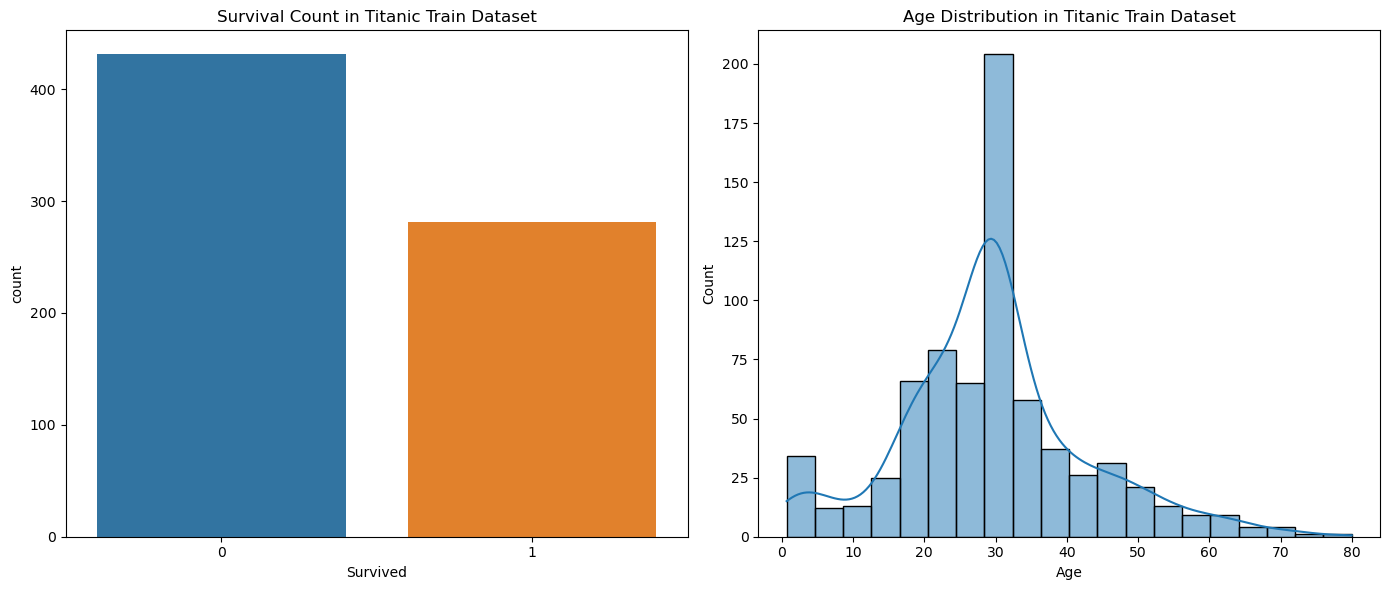

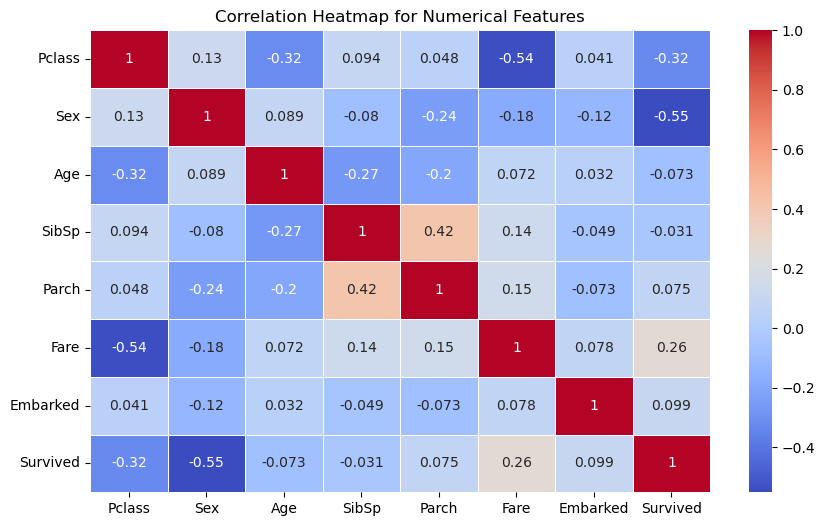

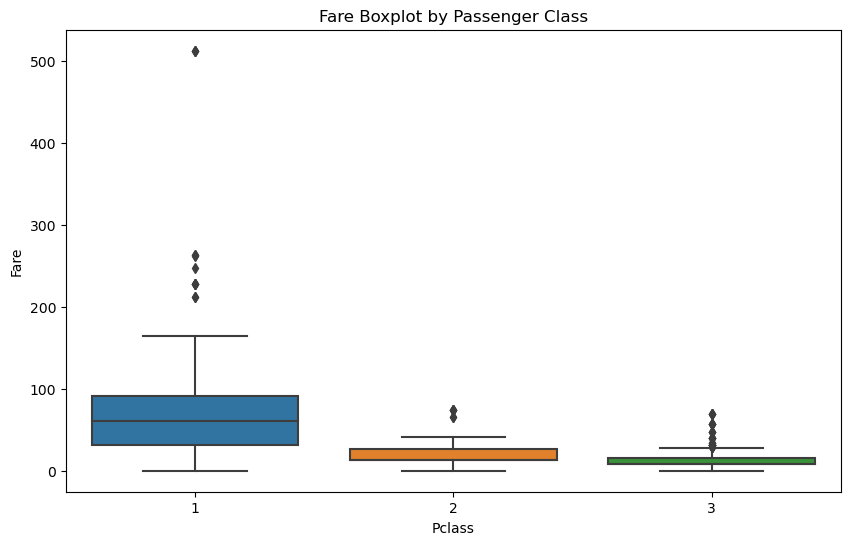

In [49]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic datasets
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

# Display the first 5 rows of the train dataset
print("Train Dataset First 5 Rows:")
display(train_data.head())

# Display the first 5 rows of the test dataset
print("\nTest Dataset First 5 Rows:")
display(test_data.head())

# Display statistical summary for the train dataset
print("\nTrain Dataset Statistical Summary:")
display(train_data.describe())

# Visualizations
plt.figure(figsize=(14, 6))

# Visualization 1: Countplot of survivors (target variable 'Survived')
plt.subplot(1, 2, 1)
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count in Titanic Train Dataset')

# Visualization 2: Distribution of ages
plt.subplot(1, 2, 2)
sns.histplot(train_data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution in Titanic Train Dataset')

plt.tight_layout()
plt.show()

# Additional Visualization 3: Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

# Additional Visualization 4: Boxplot of Fare by Passenger Class
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Boxplot by Passenger Class')
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

In [50]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_score

# Load the dataset (assuming it is a Titanic dataset as in the previous example)
train_data = pd.read_csv("titanic_train.csv")
test_data = pd.read_csv("titanic_test.csv")

# Separate features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Numerical and categorical features
numerical_features = ['Pclass', 'SibSp', 'Parch', 'Fare']
categorical_features = ['Sex', 'Embarked']

# Preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model
model = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])

# Define parameter grid
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

# Define the scorer (F1 score - macro average)
f1_macro_scorer = make_scorer(f1_score, average='macro')

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found by grid search:")
print(grid_search.best_params_)
print("\nBest F1 Macro Score:")
print(grid_search.best_score_)

# Cross-validation results for all combinations
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("\nCross-Validation Results:")
print(cv_results_df)

# Displaying the best model's performance
y_pred_train = grid_search.best_estimator_.predict(X)
print("\nClassification Report on Training Data:")
print(classification_report(y, y_pred_train))

# Feature importance (if using RandomForest)
if isinstance(grid_search.best_estimator_['model'], RandomForestClassifier):
    feature_importances = grid_search.best_estimator_['model'].feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(numerical_features + list(grid_search.best_estimator_['preprocessor'].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)), feature_importances):
        print(f"{feature}: {importance:.4f}")



Best parameters found by grid search:
{'model__max_depth': 20, 'model__min_samples_split': 10, 'model__n_estimators': 100}

Best F1 Macro Score:
0.7870897389145041

Cross-Validation Results:
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.197633      0.008428         0.029097        0.006630   
1        0.370189      0.019222         0.032931        0.003364   
2        0.724732      0.026101         0.052994        0.007771   
3        0.183410      0.012496         0.021872        0.007652   
4        0.361289      0.017206         0.031335        0.000180   
5        0.666470      0.007319         0.050073        0.006406   
6        0.172646      0.008684         0.022775        0.007111   
7        0.323325      0.005651         0.029095        0.004482   
8        0.619278      0.010412         0.052418        0.006609   
9        0.171000      0.001327         0.028631        0.006865   
10       0.348797      0.011500         0.028746        0.005

In [51]:
# Import additional necessary libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.pipeline import FeatureUnion

# Adding feature engineering components: interaction terms
interaction = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Optional: Perform PCA to reduce dimensionality after one-hot encoding
pca = PCA(n_components=2)

# Update preprocessing pipeline to include interaction terms
# Feature engineering pipeline combining interaction terms and PCA
feature_engineering = FeatureUnion(transformer_list=[
    ('preprocessor', preprocessor),  # Existing preprocessing steps
    ('interaction', interaction),    # Adding interaction terms
    ('pca', pca)                     # Optional PCA for dimensionality reduction
])

# Update the full pipeline to include feature engineering
pipeline = Pipeline(steps=[('feature_engineering', feature_engineering),
                           ('model', model)])

# Define parameter grid for hyperparameter tuning
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'feature_engineering__pca__n_components': [2, 3, 5],  # Hyperparameter for PCA
    'feature_engineering__interaction__degree': [2, 3]  # Vary interaction degree
}

# Grid search with 5-fold cross-validation and F1 Macro scoring
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=f1_macro_scorer, n_jobs=-1)

# Fit the model using grid search
grid_search.fit(X, y)

# Print the best parameters and best score
print("Best parameters found by grid search:")
print(grid_search.best_params_)
print("\nBest F1 Macro Score:")
print(grid_search.best_score_)

# Cross-validation results for all combinations
cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("\nCross-Validation Results:")
print(cv_results_df)

# Displaying the best model's performance on training data
y_pred_train = grid_search.best_estimator_.predict(X)
print("\nClassification Report on Training Data:")
print(classification_report(y, y_pred_train))

# Feature importance (if using RandomForest)
if isinstance(grid_search.best_estimator_['model'], RandomForestClassifier):
    feature_importances = grid_search.best_estimator_['model'].feature_importances_
    print("\nFeature Importances:")
    for feature, importance in zip(numerical_features + list(grid_search.best_estimator_['feature_engineering'].transformer_list[0][1].transformers_[1][1]['onehot'].get_feature_names_out(categorical_features)), feature_importances):
        print(f"{feature}: {importance:.4f}")


Best parameters found by grid search:
{'feature_engineering__interaction__degree': 2, 'feature_engineering__pca__n_components': 2, 'model__max_depth': 10, 'model__min_samples_split': 5, 'model__n_estimators': 50}

Best F1 Macro Score:
0.8239409075830965

Cross-Validation Results:
     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.752124      0.092252         0.053507        0.007442   
1         1.346027      0.145443         0.071851        0.007646   
2         2.240234      0.098707         0.115645        0.012523   
3         0.591200      0.023099         0.059454        0.006293   
4         1.074247      0.055082         0.071869        0.007655   
..             ...           ...              ...             ...   
157       1.177554      0.013814         0.068933        0.009667   
158       2.375074      0.112276         0.102311        0.010571   
159       0.656110      0.081008         0.043177        0.011001   
160       1.108531      0.050

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [52]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load the dataset (Titanic dataset in this case)
train_data = pd.read_csv("titanic_train.csv")

# Separate features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Best model from the grid search (assuming grid_search was done previously)
best_model = grid_search.best_estimator_

# Refit the best model on the entire training set
best_model.fit(X, y)

# Cross-validation scores to assess performance after re-training
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring=f1_macro_scorer)

# Print cross-validation scores after re-training
print(f"Cross-validation scores after re-training: {cross_val_scores}")
print(f"Mean F1 Macro Score after re-training: {cross_val_scores.mean()}")


Cross-validation scores after re-training: [0.7998756  0.84320994 0.80473644 0.84565217 0.82623038]
Mean F1 Macro Score after re-training: 0.8239409075830965


## Part 5 - Apply on test and show model performance estimation

In [54]:
# Load the test dataset
test_data = pd.read_csv("titanic_test.csv")

# Ensure the 'Survived' column (or any target column) is not in the test set
# Check if 'Survived' exists and drop it if present
if 'Survived' in test_data.columns:
    X_test = test_data.drop('Survived', axis=1)
else:
    X_test = test_data.copy()

# Predict on the test set using the best model
y_pred_test = best_model.predict(X_test)

# Show the first 5 predictions
print("First 5 predictions on the test set:")
print(y_pred_test[:5])



First 5 predictions on the test set:
[0 0 0 1 1]
